<a href="https://colab.research.google.com/github/inefable12/fedfo_720/blob/main/FeDFO_720_clustering_new_close.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/inefable12/fedfo_720/main/FULLc.csv") #,index_col="Title")
df

,r_mopac_Alpha_LUMO_Energy,r_mopac_Alpha_SOMO_Energy,r_mopac_Beta_LUMO_Energy,r_mopac_Beta_SOMO_Energy,r_mopac_Dipole,r_mopac_Dipole_X,r_mopac_Dipole_Y,r_mopac_Dipole_Z,r_mopac_Ionization_Energy,r_mopac_MOPAC_Heat_of_Formation,...,PMI2,PMI3,NPR1,NPR2,RadiusOfGyration,InertialShapeFactor,Eccentricity,Asphericity,SpherocityIndex,FEBc
0,-3.968,-9.466,-3.968,-9.438,40.425589,0.152708,-38.407425,12.612480,9.437856,-221.861111,...,8072.405855,11998.090776,0.401044,0.672808,4.488438,0.000140,0.916059,0.250954,0.126871,-8.6
1,-4.063,-9.469,-4.063,-9.802,39.060058,-3.593674,33.119289,20.393292,9.469243,-222.341607,...,7660.671610,11831.009210,0.423339,0.647508,4.450216,0.000129,0.905971,0.236470,0.140256,-8.9
2,-3.965,-9.595,-3.965,-9.972,38.679279,-11.327410,-29.596164,-22.177544,9.594976,-224.244498,...,21162.262055,24784.719154,0.178920,0.853843,6.381630,0.000193,0.983864,0.557125,0.073827,-6.5
3,-2.690,-10.853,-2.678,-10.772,11.913102,3.246030,-9.454733,6.480226,10.772271,-264.353086,...,7353.414791,11011.685049,0.480030,0.667783,4.375982,0.000126,0.877252,0.180351,0.215880,-9.2
4,-2.561,-10.662,-2.586,-11.066,13.122463,-5.019000,-7.402474,-9.602710,10.661890,-257.234743,...,8614.702940,12008.484424,0.405556,0.717385,4.543215,0.000147,0.914070,0.235406,0.192731,-10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-4.075,-9.582,-4.075,-9.764,36.057802,-14.430384,-32.745848,4.431541,9.581773,-224.604059,...,13227.146075,16850.118424,0.304933,0.784988,5.339699,0.000153,0.952374,0.347913,0.158852,-10.2
716,-2.387,-10.202,-2.387,-10.324,16.939629,13.662031,-5.601080,8.302279,10.201681,-261.275541,...,20476.516215,22590.799697,0.176569,0.906410,6.172464,0.000227,0.984288,0.562120,0.162607,-10.2
717,-2.856,-11.228,-2.794,-11.255,10.834239,2.914062,4.121680,-9.586487,11.227692,-273.694835,...,37157.203888,39677.229146,0.111040,0.936487,8.110279,0.000213,0.993816,0.703968,0.074442,-6.7
718,-2.410,-10.100,-2.410,-10.015,24.937325,-6.091209,-24.081866,-2.197976,10.014902,-254.655795,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.0


# EDA

# Preprocessing

In [3]:
df['PBF'] = np.where(df['PBF']==0.0,np.nan,df['PBF'])
df.dropna(inplace=True)
df.shape

(703, 24)

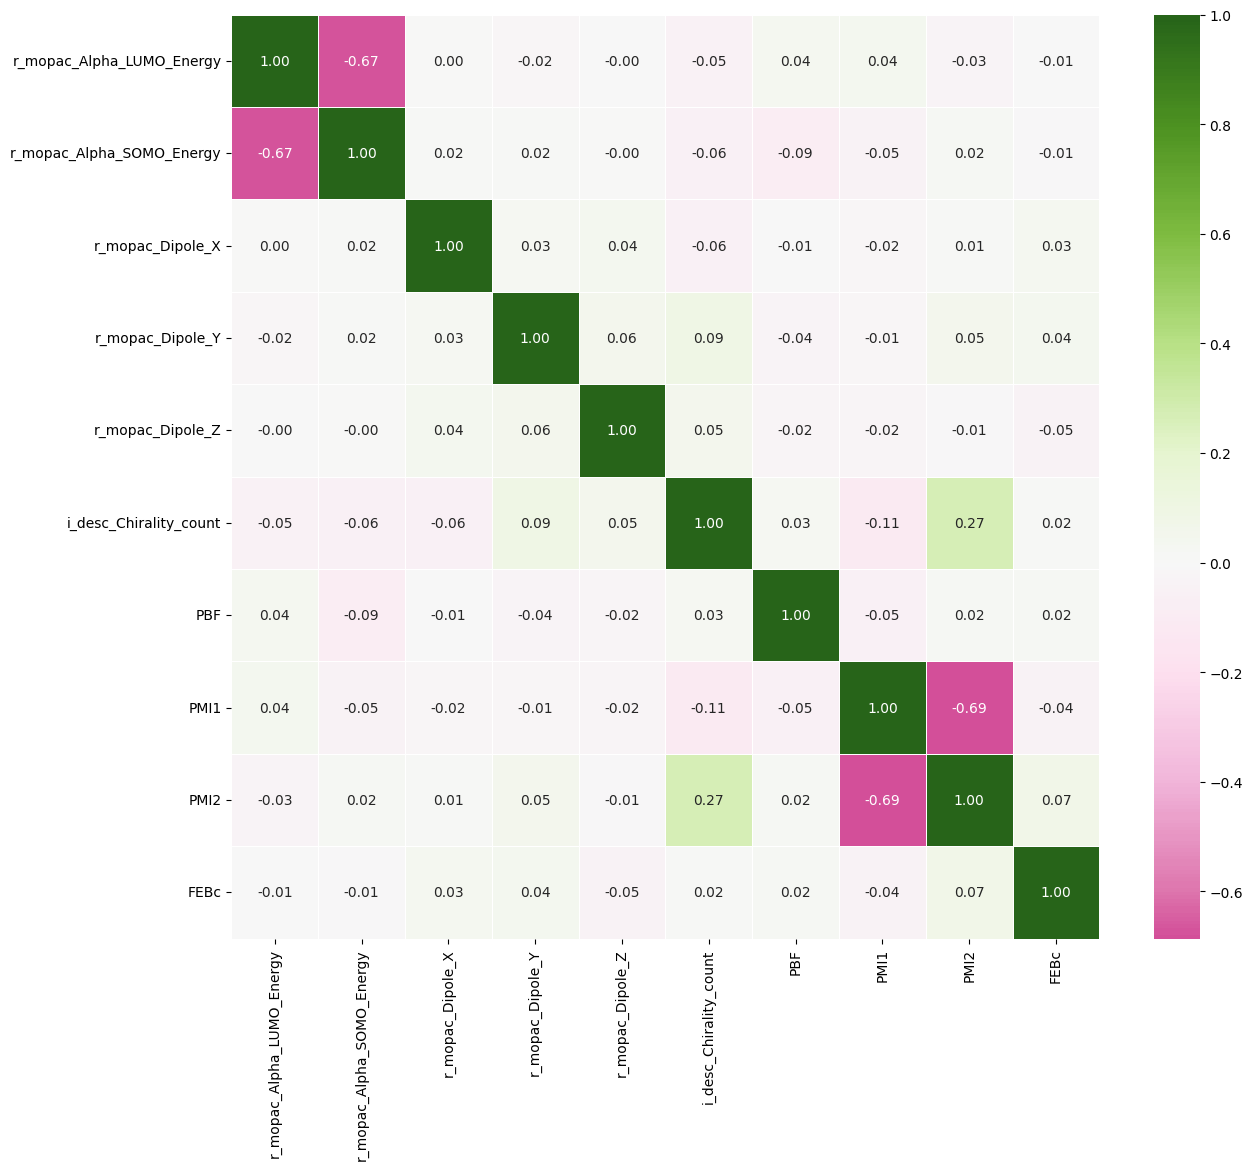

In [5]:
# @title Remove 0.80 correlation
corr_mat = df.corr()
columns = np.full((corr_mat.shape[0], ), True, dtype=bool)
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]

corr_mat = df.corr()
columns = np.full((corr_mat.shape[0], ), True, dtype=bool)
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i,j] <= -0.8:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]

plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),
            annot=True,
            fmt=".2f",
            linewidths=.5,
            center=0,
            #cbar=False,
            cmap="PiYG")
plt.show()

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
pca.fit(df_scaled)

transformada = pca.transform(df_scaled)

print(transformada.shape)

(703, 2)


Text(0, 0.5, 'PC2')

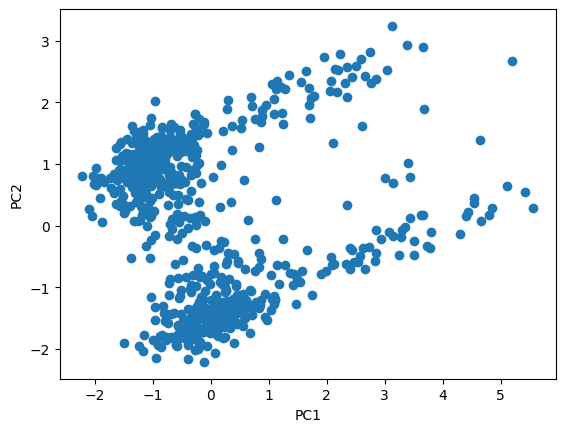

In [9]:
fig, ax = plt.subplots()
plt.scatter(transformada[:,0],transformada[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")

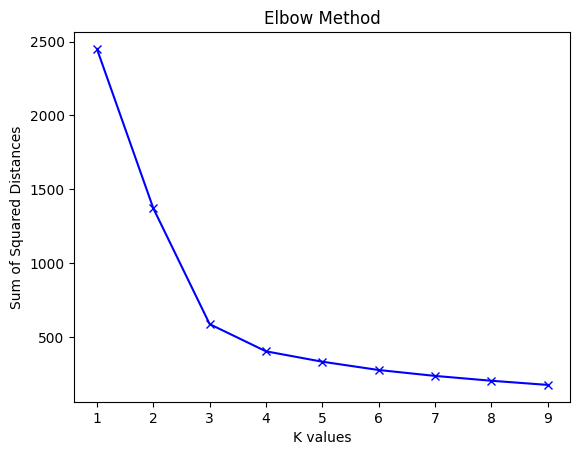

In [10]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Rango de valores para numero de cluster
K = range(1,10)
sum_of_squared_distances = []

# Suma de las distancias al cuadrado
for k in K:
    model = KMeans(n_clusters=k).fit(transformada)
    sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show();

In [11]:
df.head()

,r_mopac_Alpha_LUMO_Energy,r_mopac_Alpha_SOMO_Energy,r_mopac_Dipole_X,r_mopac_Dipole_Y,r_mopac_Dipole_Z,i_desc_Chirality_count,PBF,PMI1,PMI2,FEBc
0,-3.968,-9.466,0.152708,-38.407425,12.612480,3,0.895309,4811.759861,8072.405855,-8.6
1,-4.063,-9.469,-3.593674,33.119289,20.393292,2,0.915579,5008.533139,7660.671610,-8.9
2,-3.965,-9.595,-11.327410,-29.596164,-22.177544,1,0.900915,4434.485333,21162.262055,-6.5
3,-2.690,-10.853,3.246030,-9.454733,6.480226,2,1.141172,5285.941424,7353.414791,-9.2
4,-2.561,-10.662,-5.019000,-7.402474,-9.602710,3,1.071897,4870.107577,8614.702940,-10.9


# Kmeans

Text(0, 0.5, 'PC2')

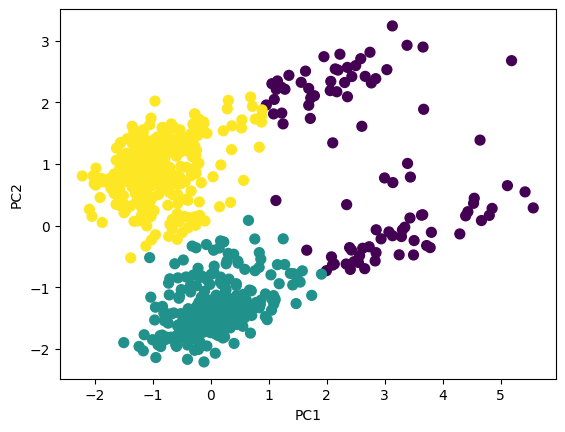

In [13]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(transformada)
y_kmeans = kmeans.predict(transformada)
plt.scatter(transformada[:,0],transformada[:,1], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")

In [14]:
df["grupo"] = y_kmeans

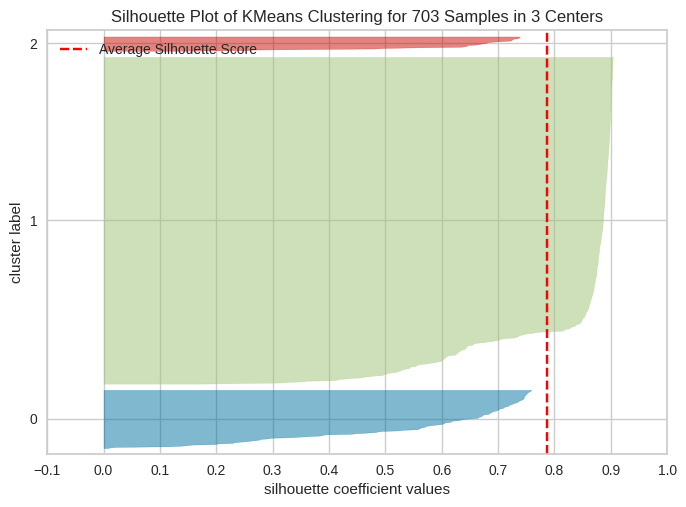

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 703 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [16]:
from yellowbrick.cluster import SilhouetteVisualizer

X = df.drop(columns=['grupo'])
y = df["grupo"]

model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)
visualizer.show()

# DBSCAN

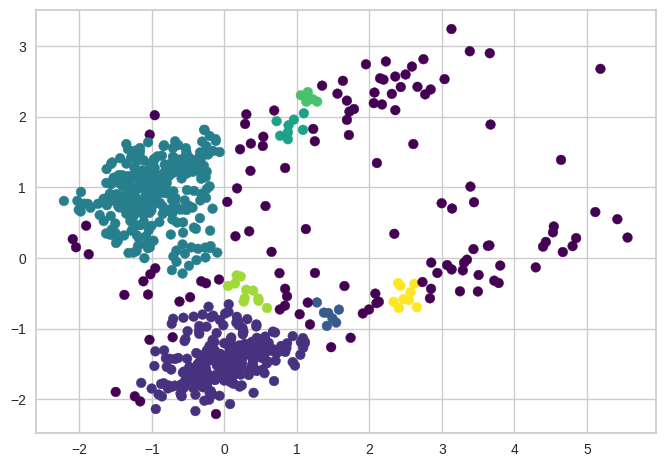

In [17]:
from sklearn.cluster import DBSCAN

model_dbscan = DBSCAN(eps = 0.2)
clusters_dbscan = model_dbscan.fit_predict(transformada)
plt.scatter(transformada[:,0],transformada[:,1], c = clusters_dbscan, cmap = "viridis")
plt.show()

In [34]:
clusters_dbscan

array([ 0,  0,  1,  2,  2,  2,  0,  2,  2,  2,  0,  0,  2, -1,  2,  2,  2,
        0,  2,  0,  2,  2,  2,  0,  2,  2,  0,  0,  2,  0,  0,  0,  3,  2,
       -1, -1,  0, -1,  2,  2,  2,  0,  2,  0,  2,  2,  0,  2,  2,  0,  0,
        0, -1,  4,  2,  2,  0,  0,  2,  0,  2,  2,  2,  0,  2,  2, -1,  2,
        0, -1, -1,  2,  3, -1,  0,  0,  0,  0,  2,  2,  2,  0,  0,  2,  2,
        0,  0,  0,  2, -1,  2,  2,  0,  2,  2,  2,  0, -1,  0,  0, -1,  0,
        0,  2,  0,  2, -1,  0,  2, -1,  2,  2, -1, -1,  2,  2,  0,  0,  2,
       -1,  2,  2,  2,  2, -1,  2,  2,  2,  0,  2,  0,  0,  2,  2,  0,  0,
        0,  0,  0,  2,  0,  0,  2,  2,  0,  3,  1, -1,  2,  2, -1,  3,  6,
        2,  2, -1,  2,  0, -1,  0,  2, -1,  0,  0,  2,  2,  2,  2, -1, -1,
       -1,  0,  2, -1,  2,  2,  0, -1,  2,  2,  2,  2,  2,  0,  2,  5,  2,
        0, -1,  2,  2,  1,  0,  0,  0,  2,  0,  2,  5,  0,  2,  0,  2,  2,
        2,  0, -1, -1,  0,  4, -1, -1,  2,  0,  2,  2,  0,  0,  0,  2,  5,
        2,  2, -1,  2, -1

In [18]:
np.unique(clusters_dbscan)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [35]:
df["grupo"]=clusters_dbscan

In [44]:
df[df["grupo"]==0]

,r_mopac_Alpha_LUMO_Energy,r_mopac_Alpha_SOMO_Energy,r_mopac_Dipole_X,r_mopac_Dipole_Y,r_mopac_Dipole_Z,i_desc_Chirality_count,PBF,PMI1,PMI2,FEBc,grupo
0,-3.968,-9.466,0.152708,-38.407425,12.612480,3,0.895309,4811.759861,8072.405855,-8.6,0
1,-4.063,-9.469,-3.593674,33.119289,20.393292,2,0.915579,5008.533139,7660.671610,-8.9,0
6,-4.040,-9.539,-0.610382,34.835228,-21.068596,2,1.110855,5559.684464,15903.666137,-7.0,0
10,-3.980,-9.523,9.963500,-29.681578,19.976201,0,1.063117,5070.029269,7572.890722,-9.7,0
11,-4.021,-9.374,-1.531515,-31.903073,18.704734,1,0.950433,5758.699047,6662.098913,-7.3,0
...,...,...,...,...,...,...,...,...,...,...,...
693,-3.867,-9.559,9.511050,-20.928750,-22.929632,1,1.024620,4938.759473,8280.819438,-11.3,0
695,-4.005,-9.516,18.339905,-28.218773,-21.978268,1,0.937632,4194.381360,8193.763853,-9.6,0
702,-4.048,-9.541,-6.330758,28.164803,-28.670904,2,0.968414,4513.796188,9060.716697,-9.6,0
705,-4.037,-9.552,5.571153,30.393246,26.039617,2,1.182857,5138.573271,7228.186372,-7.2,0


In [39]:
df[df["grupo"]==2]

,r_mopac_Alpha_LUMO_Energy,r_mopac_Alpha_SOMO_Energy,r_mopac_Dipole_X,r_mopac_Dipole_Y,r_mopac_Dipole_Z,i_desc_Chirality_count,PBF,PMI1,PMI2,FEBc,grupo
3,-2.690,-10.853,3.246030,-9.454733,6.480226,2,1.141172,5285.941424,7353.414791,-9.2,2
4,-2.561,-10.662,-5.019000,-7.402474,-9.602710,3,1.071897,4870.107577,8614.702940,-10.9,2
5,-2.446,-10.006,-7.644362,-25.274068,2.023438,0,0.909485,4593.337387,8635.633736,-10.5,2
7,-2.393,-10.750,-5.063948,-5.307441,-9.615473,2,0.830049,5817.470299,12690.660465,-10.6,2
8,-3.611,-11.314,1.543773,-5.371729,11.749468,3,0.937120,5674.135161,12436.039696,-8.9,2
...,...,...,...,...,...,...,...,...,...,...,...
709,-2.783,-10.890,-2.397427,3.651825,-13.808745,1,0.869288,5625.827159,10762.039930,-10.3,2
710,-2.596,-9.917,3.153382,19.023096,1.370576,1,0.996113,4745.546029,8332.195940,-9.7,2
712,-2.964,-11.410,-8.587186,8.441699,-6.944487,1,1.030296,4181.972883,8561.434911,-6.6,2
713,-2.432,-10.263,7.080087,-20.203846,2.613768,2,1.305610,4954.179879,6453.647666,-10.3,2


In [45]:
ds = df.copy()

In [46]:
ds["grupo"] = np.where(df["grupo"]==1, np.nan, df["grupo"])
ds["grupo"] = np.where(df["grupo"]==3, np.nan, df["grupo"])
ds["grupo"] = np.where(df["grupo"]==4, np.nan, df["grupo"])
ds["grupo"] = np.where(df["grupo"]==5, np.nan, df["grupo"])
ds["grupo"] = np.where(df["grupo"]==6, np.nan, df["grupo"])
ds["grupo"] = np.where(df["grupo"]==-1, np.nan, df["grupo"])

In [47]:
ds = ds.dropna()
ds

,r_mopac_Alpha_LUMO_Energy,r_mopac_Alpha_SOMO_Energy,r_mopac_Dipole_X,r_mopac_Dipole_Y,r_mopac_Dipole_Z,i_desc_Chirality_count,PBF,PMI1,PMI2,FEBc,grupo
0,-3.968,-9.466,0.152708,-38.407425,12.612480,3,0.895309,4811.759861,8072.405855,-8.6,0.0
1,-4.063,-9.469,-3.593674,33.119289,20.393292,2,0.915579,5008.533139,7660.671610,-8.9,0.0
2,-3.965,-9.595,-11.327410,-29.596164,-22.177544,1,0.900915,4434.485333,21162.262055,-6.5,1.0
3,-2.690,-10.853,3.246030,-9.454733,6.480226,2,1.141172,5285.941424,7353.414791,-9.2,2.0
4,-2.561,-10.662,-5.019000,-7.402474,-9.602710,3,1.071897,4870.107577,8614.702940,-10.9,2.0
...,...,...,...,...,...,...,...,...,...,...,...
712,-2.964,-11.410,-8.587186,8.441699,-6.944487,1,1.030296,4181.972883,8561.434911,-6.6,2.0
713,-2.432,-10.263,7.080087,-20.203846,2.613768,2,1.305610,4954.179879,6453.647666,-10.3,2.0
714,-3.961,-9.521,10.875382,33.431080,-12.881770,2,1.059030,3606.909710,19947.064582,-9.7,6.0
715,-4.075,-9.582,-14.430384,-32.745848,4.431541,2,1.045323,5138.150501,13227.146075,-10.2,0.0


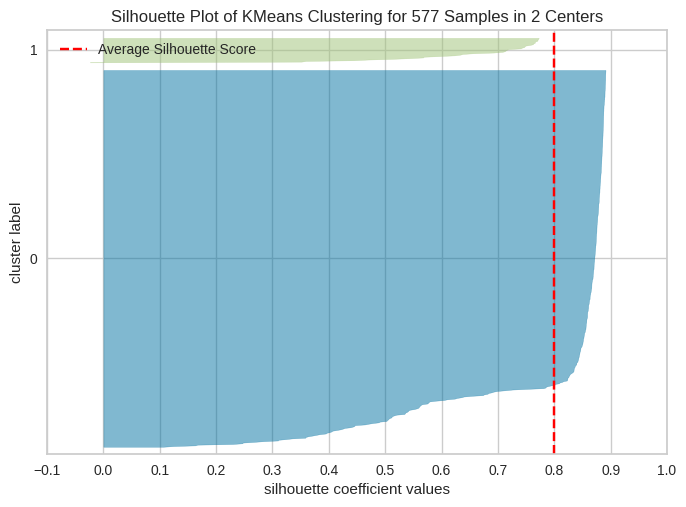

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 577 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [49]:
ds_X = ds.drop(columns=['grupo'])
ds_y = df["grupo"]

model_ = KMeans(2, random_state=42)
visualizer = SilhouetteVisualizer(model_, colors='yellowbrick')

visualizer.fit(ds_X)
visualizer.show()

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ds_X = ds.drop(columns=['grupo'])
ds_y = df["grupo"]

scaler = StandardScaler()
ds_X_scaled = scaler.fit_transform(ds_X)

pca = PCA(n_components=2)
pca.fit(ds_X_scaled)

PCA(n_components=2)

In [51]:
ds_transformada = pca.transform(ds_X_scaled)
print(ds_transformada.shape)

(577, 2)


Text(0, 0.5, 'PC2')

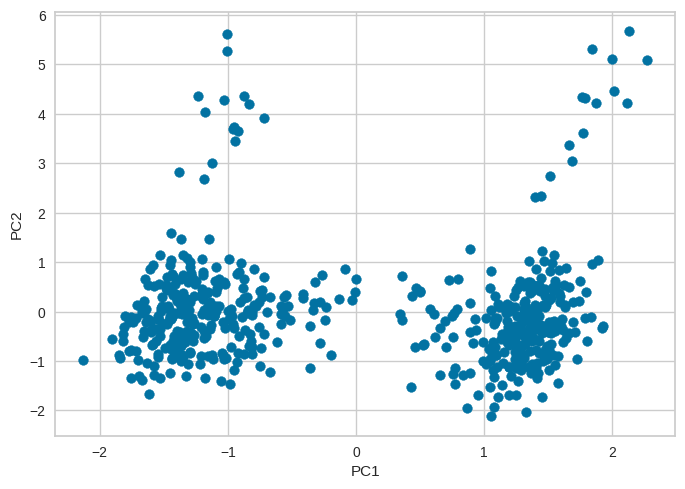

In [52]:
fig, ax = plt.subplots()
plt.scatter(ds_transformada[:,0],ds_transformada[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")

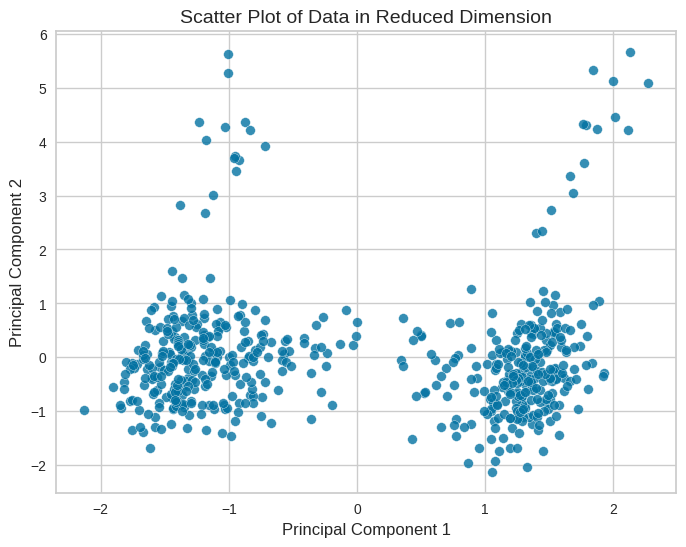

In [63]:
import matplotlib.pyplot as plt

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6))  # Tamaño del gráfico

# Scatter plot de los puntos en el espacio reducido
ax.scatter(ds_transformada[:, 0], ds_transformada[:, 1], alpha=0.8, edgecolors='w')

# Etiquetas para los ejes x e y
ax.set_xlabel("Principal Component 1", fontsize=12)
ax.set_ylabel("Principal Component 2", fontsize=12)

# Título del gráfico
ax.set_title("Scatter Plot of Data in Reduced Dimension", fontsize=14)

# Ajustes en los ejes para mostrar los valores de manera clara
ax.tick_params(axis='both', which='major', labelsize=10)

# Agregar cuadrícula
ax.grid(True)

# Mostrar el gráfico
plt.show()

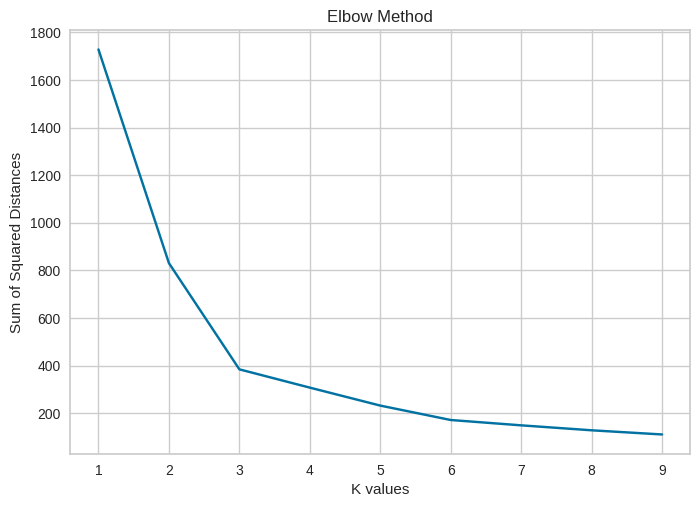

In [61]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Rango de valores para numero de cluster
K = range(1,10)
sum_of_squared_distances = []

# Suma de las distancias al cuadrado
for k in K:
    model = KMeans(n_clusters=k).fit(ds_transformada)
    sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, '-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show();

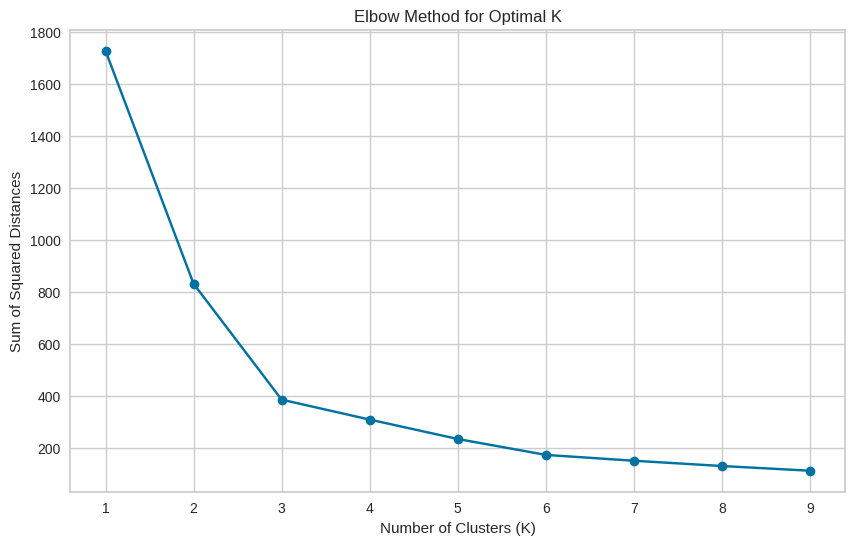

In [62]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Rango de valores para número de clusters
K = range(1, 10)
sum_of_squared_distances = []

# Suma de las distancias al cuadrado
for k in K:
    model = KMeans(n_clusters=k).fit(ds_transformada)
    sum_of_squared_distances.append(model.inertia_)

# Gráfico
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Línea con marcadores
plt.plot(K, sum_of_squared_distances, marker='o', linestyle='-')

# Etiquetas
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal K')

# Cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

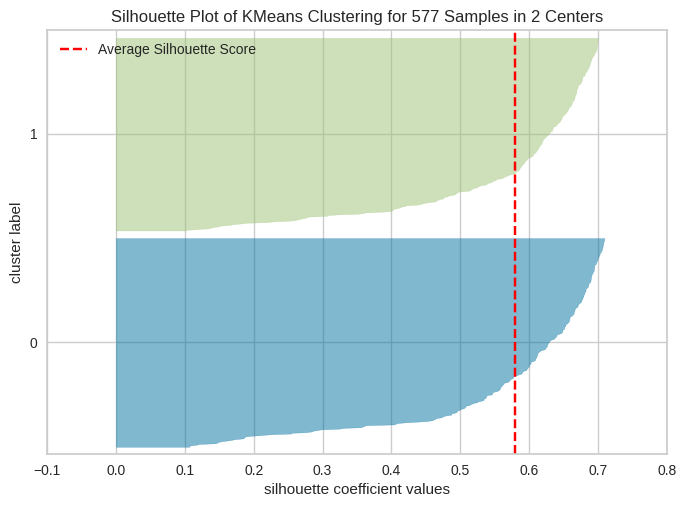

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 577 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [53]:
model_ = KMeans(2, random_state=42)
visualizer = SilhouetteVisualizer(model_, colors='yellowbrick')

visualizer.fit(ds_transformada)
visualizer.show()

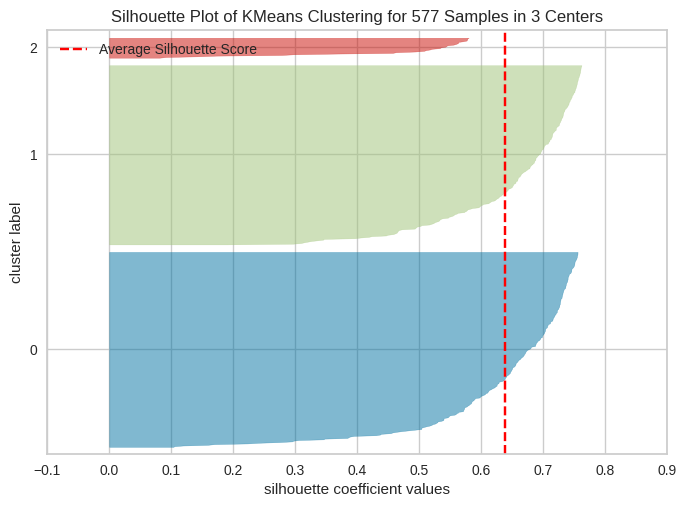

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 577 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [54]:
model_ = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model_, colors='yellowbrick')

visualizer.fit(ds_transformada)
visualizer.show()

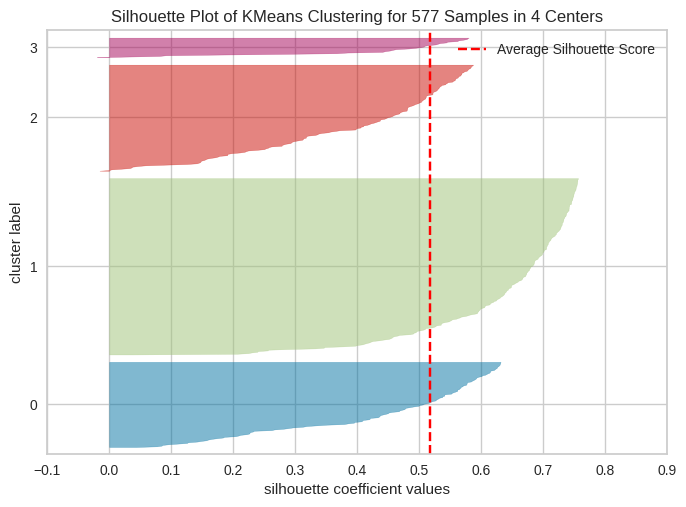

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 577 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [55]:
model_ = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model_, colors='yellowbrick')

visualizer.fit(ds_transformada)
visualizer.show()

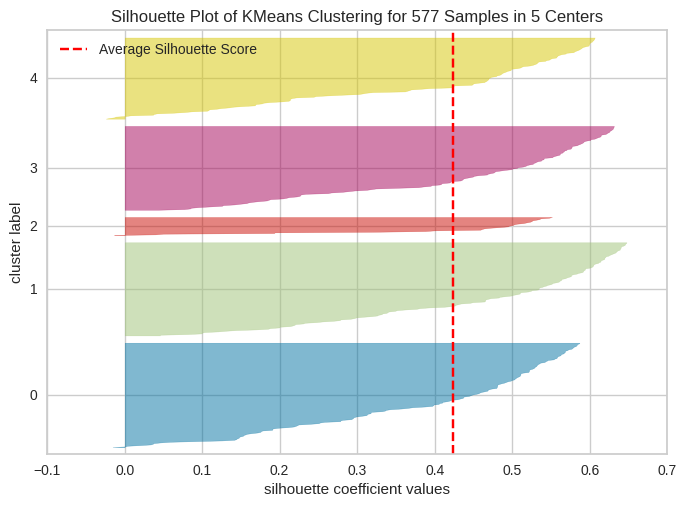

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 577 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [56]:
model_ = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model_, colors='yellowbrick')

visualizer.fit(ds_transformada)
visualizer.show()

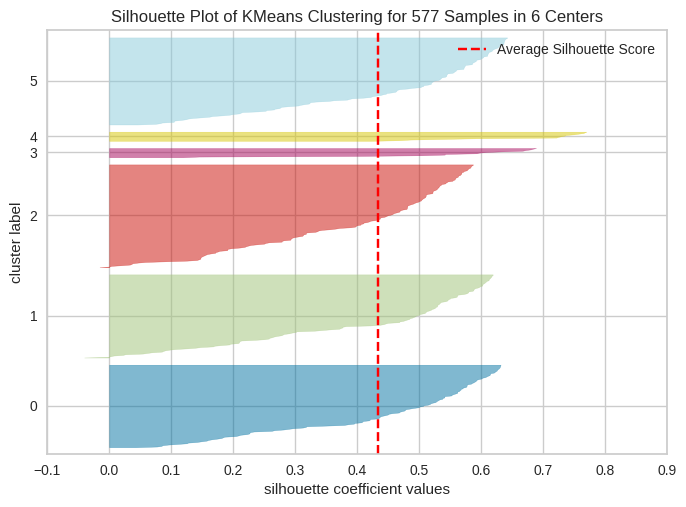

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 577 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [57]:
model_ = KMeans(6, random_state=42)
visualizer = SilhouetteVisualizer(model_, colors='yellowbrick')

visualizer.fit(ds_transformada)
visualizer.show()

array([[<Axes: title={'center': 'FEBc'}>]], dtype=object)

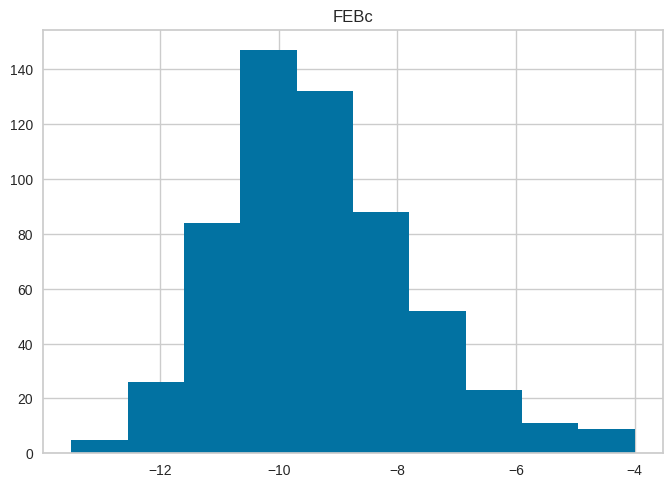

In [64]:
ds.hist(column='FEBc')

In [69]:
ds['FEBc'].describe()

count    577.000000
mean      -9.354419
std        1.599214
min      -13.500000
25%      -10.300000
50%       -9.600000
75%       -8.400000
max       -4.000000
Name: FEBc, dtype: float64

In [70]:
df['FEBc'].describe()

count    703.000000
mean      -9.300569
std        1.635486
min      -13.500000
25%      -10.300000
50%       -9.600000
75%       -8.300000
max       -3.500000
Name: FEBc, dtype: float64